# Exploratory Data Analysis

**Author:** Abiodun Anifowose

## Stackoverflow Survey 2024

---

### 1. Data Understanding

* The dataset was first examined to understand column types, multi-select fields, and the primary key (`ResponseId`).
* The sample size and methodology (self-selection) were noted.
* Numeric columns were identified to focus on salary, years coding, and work experience fields.

<details>
<summary>More details</summary>

* Multi-select fields (e.g., programming languages) were parsed into lists and exploded into long format for counting and median salary calculations.
* Only countries with more than 100 respondents were considered for comparative salary analysis.

</details>

---

### 2. Data Cleaning

* Column names were standardized, numeric columns checked, and categorical columns validated.
* Missing values were handled carefully: rows missing salary, work experience, and other key numeric columns were dropped (nan)
* Multi-select columns were exploded to allow for aggregation by programming language or framework.

<details>
<summary>More details</summary>

* For compensation, extreme values were either winsorized or transformed using a logarithmic scale.
* Outliers were visualized with box and violin plots and accounted for in median computations.

</details>

---

### 3. Core Visualizations

* **Median Salary by Work Experience** was visualized with bar charts and line plots, showing salary trends and highlighting median values.
* **Median Salary by Programming Language** revealed differences among top-used languages.
* **Line Plots for Python vs JavaScript Developers** displayed median salaries by experience, with highlighted areas for above/below median.
* **Median Salary by Country** included only countries with sufficient sample size, highlighting top 15 countries.
* **Pie Charts** illustrated respondent proportions by top countries.

<details>
<summary>More details</summary>

* Colors and line styles were varied dynamically in line plots to distinguish between programming languages.
* Log transformation helped reduce the visual impact of extreme salary outliers.
* Multi-select exploded formats allowed counting the most common languages and tools.

</details>

---

### 4. Multi-select Analysis

* Ranking of programming languages, frameworks, and tools was done to identify top trends.
* Exploded columns enabled aggregation of median salary per language, tool, or framework.

<details>
<summary>More details</summary>

* Languages were sorted by median salary to highlight the highest paying skills.
* Only top languages (e.g., 5–15) were visualized in bar and line charts for clarity.

</details>

---

### 5. Visual Design Choices

* Bar charts, line plots, and colored markers were used for numeric comparisons.
* Box and violin plots were applied for salary distribution visualization.
* Pie charts displayed categorical proportions (e.g., respondent distribution by country).
* Dynamic color maps, line widths, and marker styles improved readability.

---

### 6. Reproducibility Notes

* Cleaning, filtering, and transformations were fully documented.
* Median and percentile statistics were preferred for skewed salary data.
* Multi-select columns were handled via exploded format for accurate counts.

<details>
<summary>More details</summary>

* Plots were built using both Matplotlib and Seaborn for flexibility and styling.
* Filters for experience, country, and top languages were applied dynamically to improve insights.

</details>

---

**Note:** Folks are encouraged to **fork this repository and submit pull requests** to improve or extend the EDA performed here. Please reach out to me to get the csv file. I shall also upload it to my Google drive and update the link here soon. 



In [184]:
# Library Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
# Load data from CSV

df = pd.read_csv('survey_results_public.csv')
schema_df = pd.read_csv('survey_results_schema.csv')

In [3]:
# Get the shape of the dataframe
df.shape

(65437, 114)

In [4]:
# Set the max_columns to the available columns
pd.set_option('display.max_columns', 114)

In [5]:
# Change the index to the ResponseId
df.set_index('ResponseId', inplace=True)

In [6]:
df.head()

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [7]:
# Show a quick statistics of numeric data in the df

df.describe()

,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [8]:
# Print all the columns so as to have 
# access to them at a glance for ease of copying

print(list(df.columns))

['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackA

In [182]:
numeric_cols = cleaned_df_1.select_dtypes(include='number').columns
print(numeric_cols)

Index(['WorkExp', 'CompTotal', 'ConvertedCompYearly'], dtype='object')


In [9]:
# Get the dimension of the schema df

schema_df.shape

(87, 6)

In [10]:
schema_df.head()

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR


In [11]:
schema_df.loc[0:2, ['qname', 'question']]

,qname,question
0,MainBranch,Which of the following options best describes ...
1,Age,What is your age?*
2,Employment,Which of the following best describes your cur...


In [12]:
schema_df.loc[1, 'question']

'What is your age?*'

In [13]:
print(schema_df.iloc[1, 2])

What is your age?*


In [14]:
schema_list = schema_df.loc[0::, 'qname'].tolist()
print(schema_list)

['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'Language', 'Database', 'Platform', 'Webframe', 'Embedded', 'MiscTech', 'ToolsTech', 'NEWCollabTools', 'OpSys', 'OfficeStackAsync', 'OfficeStackSync', 'AISearchDev', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOHow', 'SOComm', 'AISelect', 'AISent', 'AIBen', 'AIAcc', 'AIComplex', 'AITool', 'AINext', 'AIThreat', 'AIEthics', 'AIChallenges', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge', 'Frequency', 'TimeSearching', 'TimeAnswering', 'Frustration', 'ProfessionalTech', 'ProfessionalCloud', 'ProfessionalQuestion', 'Industry', 'JobSat', 'JobSatPoints', 'SOTeamsUsage', 'SurveyLength', 'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', '

In [15]:
schema_df.loc[(schema_df['qname'] == 'SurveyLength'), ['qname', 'question']]

,qname,question
64,SurveyLength,How do you feel about the length of the survey...


In [16]:
# Function to get the question for a specified column in the durver df

def get_question(col):
    if col in schema_list:
        return schema_df.loc[(schema_df['qname'] == col), ['qname', 'question']]
    else:
        return print('Question not found!')

In [17]:
get_question('SurveyLength')

,qname,question
64,SurveyLength,How do you feel about the length of the survey...


In [18]:
# Create and print out columns of interest for a quick reference

col_of_interest = ['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'WorkExp', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'ConvertedCompYearly', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'SOAccount']

print(col_of_interest)

['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'WorkExp', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'ConvertedCompYearly', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'SOAccount']


In [19]:
cleaned_df_1 = df[col_of_interest]

In [20]:
cleaned_df_1.head()

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,WorkExp,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,TechEndorse,Country,Currency,CompTotal,ConvertedCompYearly,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,SOAccount
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,NaN,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17.0,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Yes
3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,37,27,Developer Experience,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,C#,C#,C#,Yes
4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,NaN,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN,4,NaN,"Developer, full-stack",NaN,NaN,Canada,NaN,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,No
5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...",NaN,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,9,NaN,"Developer, full-stack",NaN,NaN,Norway,NaN,NaN,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python,C++;HTML/CSS;JavaScript;Lua;Python,Yes


In [21]:
cleaned_df_1.describe()

,WorkExp,CompTotal,ConvertedCompYearly
count,29658.000000,3.374000e+04,2.343500e+04
mean,11.466957,2.963841e+145,8.615529e+04
std,9.168709,5.444117e+147,1.867570e+05
min,0.000000,0.000000e+00,1.000000e+00
25%,4.000000,6.000000e+04,3.271200e+04
50%,9.000000,1.100000e+05,6.500000e+04
75%,16.000000,2.500000e+05,1.079715e+05
max,50.000000,1.000000e+150,1.625660e+07


In [22]:
# cleaned_df_1.loc[:, 'Age'] = cleaned_df_1['Age'].str.replace('years old', '', regex=False)

cleaned_df_1.loc[:, 'Age'] = cleaned_df_1['Age'].str.replace(
    r'(\d+)\s+years\s+old', r'\1', regex=True
).str.replace(
    r'(\d+)\s+years\s+or\s+older', r'\1+', regex=True
)

In [23]:
cleaned_df_1.head()

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,WorkExp,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,TechEndorse,Country,Currency,CompTotal,ConvertedCompYearly,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,SOAccount
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Under 18,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,NaN,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,35-44,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17.0,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Yes
3,I am a developer by profession,45-54,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,37,27,Developer Experience,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,C#,C#,C#,Yes
4,I am learning to code,18-24,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,NaN,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN,4,NaN,"Developer, full-stack",NaN,NaN,Canada,NaN,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,No
5,I am a developer by profession,18-24,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...",NaN,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,9,NaN,"Developer, full-stack",NaN,NaN,Norway,NaN,NaN,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python,C++;HTML/CSS;JavaScript;Lua;Python,Yes


In [24]:
# cleaned_df_1.sort_values(by=['ConvertedCompYearly'], axis=0, ascending=False)

In [25]:
cleaned_df_1['ConvertedCompYearly'].nlargest()

ResponseId
15838    16256603.0
12724    13818022.0
28380     9000000.0
17594     6340564.0
17673     4936778.0
Name: ConvertedCompYearly, dtype: float64

In [26]:
cleaned_df_1['YearsCode'].unique()

array([nan, '20', '37', '4', '9', '10', '7', '1', '15', '30', '31', '6',
       '12', '22', '5', '36', '25', '44', '24', '18', '3', '8',
       'More than 50 years', '11', '29', '40', '39', '2', '42', '34',
       '19', '35', '16', '33', '13', '23', '14', '28', '17', '21', '43',
       '46', '26', '32', '41', '45', '27', '38', '50', '48', '47',
       'Less than 1 year', '49'], dtype=object)

In [27]:
def clean_yearscode(x):
    if x == 'Less than 1 year':
        return 0
    elif x == 'More than 50 years':
        return 51
    else:
        try:
            return int(x)  # convert numeric strings to int
        except:
            return None    # handle missing/invalid values

cleaned_df_1.loc[:, 'YearsCode'] = cleaned_df_1['YearsCode'].apply(clean_yearscode)

In [183]:
# cleaned_df_1.dropna(subset=['YearsCode'], inplace=True)

median_value = cleaned_df_1['YearsCode'].median()
cleaned_df_1.loc[:, 'YearsCode'] = cleaned_df_1['YearsCode'].fillna(median_value).infer_objects(copy=False)

pd.set_option('future.no_silent_downcasting', True)

In [29]:
cleaned_df_1['YearsCode'].unique()

array([11.0, 20.0, 37.0, 4.0, 9.0, 10.0, 7.0, 1.0, 15.0, 30.0, 31.0, 6.0,
       12.0, 22.0, 5.0, 36.0, 25.0, 44.0, 24.0, 18.0, 3.0, 8.0, 51.0,
       29.0, 40.0, 39.0, 2.0, 42.0, 34.0, 19.0, 35.0, 16.0, 33.0, 13.0,
       23.0, 14.0, 28.0, 17.0, 21.0, 43.0, 46.0, 26.0, 32.0, 41.0, 45.0,
       27.0, 38.0, 50.0, 48.0, 47.0, 0.0, 49.0], dtype=object)

In [30]:
cleaned_df_1['YearsCode'].mean()

np.float64(13.925424454055046)

In [31]:
comp_filter = cleaned_df_1['ConvertedCompYearly'].notna()
cleaned_df_1.loc[comp_filter, 'ConvertedCompYearly'].unique()

array([  7322.,  30074.,  91295., ...,  15637.,   9711., 116844.])

In [32]:
cleaned_df_1.loc[comp_filter, 'ConvertedCompYearly'].value_counts

<bound method IndexOpsMixin.value_counts of ResponseId
73         7322.0
375       30074.0
380       91295.0
386       53703.0
390      110000.0
           ...   
41181     44640.0
41185    170000.0
41186    116844.0
41187     12000.0
41188    222834.0
Name: ConvertedCompYearly, Length: 23435, dtype: float64>

In [33]:
comp_filter_2 = cleaned_df_1['ConvertedCompYearly'] >= 20000
cleaned_df_1.loc[comp_filter_2, 'ConvertedCompYearly'].value_counts

<bound method IndexOpsMixin.value_counts of ResponseId
375       30074.0
380       91295.0
386       53703.0
390      110000.0
393      161044.0
           ...   
41174     23256.0
41181     44640.0
41185    170000.0
41186    116844.0
41188    222834.0
Name: ConvertedCompYearly, Length: 19550, dtype: float64>

In [78]:
# Cleaning the column of interest

cleaned_df_1 = cleaned_df_1.copy()
cleaned_df_1.dropna(subset=['ConvertedCompYearly', 'WorkExp', 'Age', 'LanguageHaveWorkedWith'], inplace=True)

In [79]:
cleaned_df_1.describe()

,WorkExp,CompTotal,ConvertedCompYearly
count,16105.000000,1.610500e+04,1.610500e+04
mean,11.125116,2.444909e+07,8.544298e+04
std,8.885647,5.768259e+08,1.569233e+05
min,0.000000,1.000000e+00,1.000000e+00
25%,4.000000,6.000000e+04,3.387900e+04
50%,9.000000,1.100000e+05,6.600000e+04
75%,15.000000,2.700000e+05,1.082800e+05
max,50.000000,4.800000e+10,1.381802e+07


In [80]:
cleaned_df_1['WorkExp'].unique()

array([ 3.,  7.,  8., 18., 30., 16., 17.,  1.,  4., 15., 25., 20., 10.,
       11., 28., 24., 12., 23.,  9., 40., 14., 27., 26.,  0., 19., 22.,
       13., 44., 41.,  2.,  5.,  6., 31., 36., 29., 45., 39., 38., 35.,
       21., 34., 50., 32., 37., 33., 42., 46., 43., 49., 48., 47.])

In [81]:
cleaned_df_1.shape

(16105, 24)

In [82]:
cleaned_df_1.head()

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,WorkExp,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,TechEndorse,Country,Currency,CompTotal,ConvertedCompYearly,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,SOAccount
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,
73,I am a developer by profession,18-24,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",3.0,On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,3.0,1,Data scientist or machine learning specialist,100 to 499 employees,APIs;Customization;Integrated developer commun...,Pakistan,PKR\tPakistani rupee,2040000.0,7322.0,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,C#;Rust;Scala,NaN,Yes
380,I am a developer by profession,35-44,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7.0,Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,API document(s) and/or SDK document(s),15.0,6,Data scientist or machine learning specialist,20 to 99 employees,APIs;Connected to an open source project,Turkey,EUR European Euro,85000.0,91295.0,JavaScript;Julia;Python;SQL;TypeScript,Go;JavaScript;Python;Rust;SQL;TypeScript,JavaScript;Python;SQL;TypeScript,Yes
390,I am a developer by profession,25-34,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,8.0,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,NaN,7.0,7,Student,10 to 19 employees,Customization,United States of America,USD\tUnited States dollar,110000.0,110000.0,HTML/CSS;JavaScript;Python;SQL;TypeScript,Go;Rust;Swift,NaN,Yes
393,I am a developer by profession,35-44,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",18.0,Books / Physical media,NaN,NaN,32.0,18,Engineering manager,"1,000 to 4,999 employees",APIs;Reputation for quality and excellence;Con...,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,126420.0,161044.0,C#;HTML/CSS;Java;JavaScript;MicroPython;Python...,HTML/CSS;JavaScript;MicroPython;Python;TypeScript,HTML/CSS;JavaScript;MicroPython;Python;TypeScript,Yes
399,I am a developer by profession,45-54,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,Some college/university study without earning ...,30.0,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,38.0,30,"Developer, full-stack","1,000 to 4,999 employees",APIs;Customization;Integrated developer commun...,United States of America,USD\tUnited States dollar,195000.0,195000.0,Bash/Shell (all shells);C#;HTML/CSS;JavaScript...,C#;HTML/CSS;JavaScript;SQL;TypeScript,C#;HTML/CSS;JavaScript;SQL;TypeScript,Yes


In [83]:
cleaned_df_1[['Age', 'ConvertedCompYearly', 'WorkExp', 'LanguageHaveWorkedWith', 'Country']]

,Age,ConvertedCompYearly,WorkExp,LanguageHaveWorkedWith,Country
ResponseId,,,,,
73,18-24,7322.0,3.0,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,Pakistan
380,35-44,91295.0,7.0,JavaScript;Julia;Python;SQL;TypeScript,Turkey
390,25-34,110000.0,8.0,HTML/CSS;JavaScript;Python;SQL;TypeScript,United States of America
393,35-44,161044.0,18.0,C#;HTML/CSS;Java;JavaScript;MicroPython;Python...,United Kingdom of Great Britain and Northern I...
399,45-54,195000.0,30.0,Bash/Shell (all shells);C#;HTML/CSS;JavaScript...,United States of America
...,...,...,...,...,...
41179,18-24,9711.0,2.0,C++;HTML/CSS;JavaScript;PHP;Python;SQL;TypeScript,Honduras
41181,25-34,44640.0,3.0,C;Python,Sweden
41185,45-54,170000.0,30.0,Bash/Shell (all shells);C;HTML/CSS;Java;JavaSc...,United States of America


In [84]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


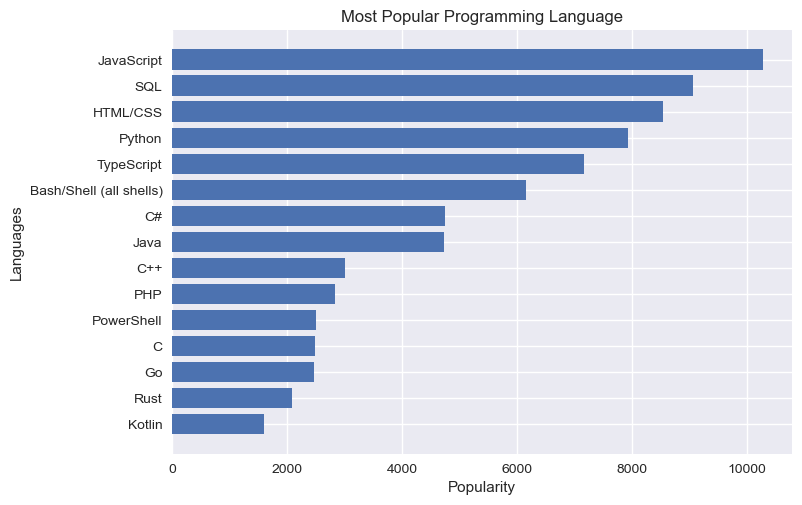

In [85]:
# Retrieval of the counts of each programming 
# language into a list followed be charting

lang_worked_with = cleaned_df_1['LanguageHaveWorkedWith']
lang_counter = Counter()

for lang in lang_worked_with:
    lang_counter.update(lang.split(';'))

languages = []
popularity = []

for item in lang_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

languages.reverse()
popularity.reverse()

plt.style.use('seaborn-v0_8')

x = languages
y = popularity
plt.barh(x, y)
plt.title('Most Popular Programming Language')
plt.xlabel('Popularity')
plt.ylabel('Languages')
plt.show()


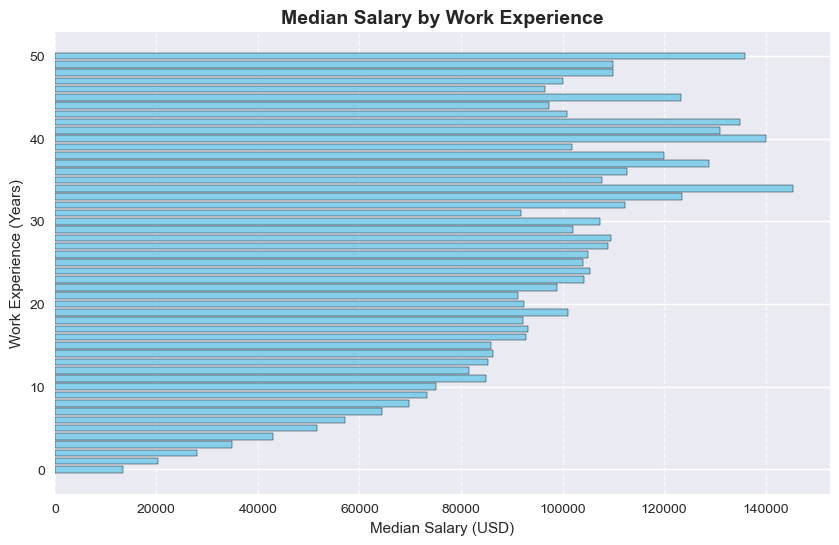

In [129]:

median_salaries = cleaned_df_1.groupby('WorkExp')['ConvertedCompYearly'].median().sort_index()

plt.style.use('seaborn-v0_8')

plt.figure(figsize=(10,6))
plt.barh(median_salaries.index, median_salaries.values, color="skyblue", edgecolor="#000")
plt.title('Median Salary by Work Experience', fontsize=14, fontweight='bold')
plt.xlabel('Median Salary (USD)')
plt.ylabel('Work Experience (Years)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

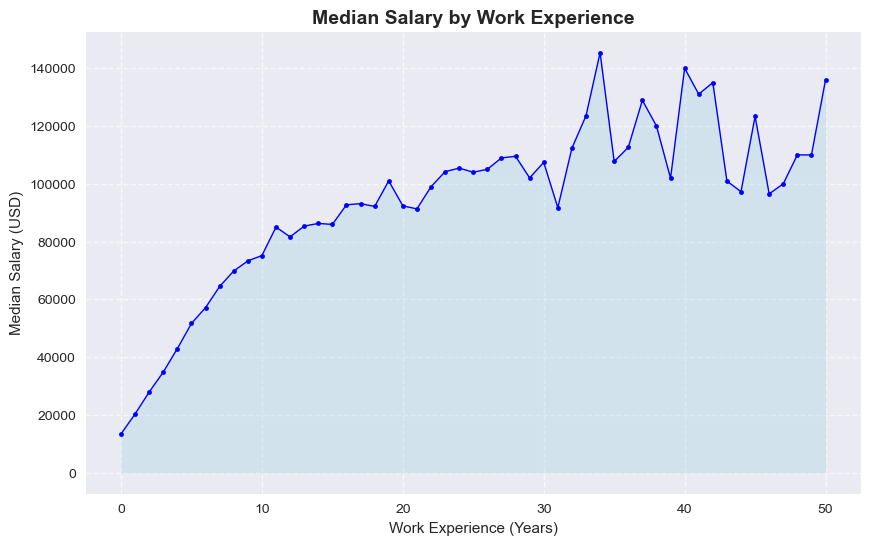

In [306]:

plt.figure(figsize=(10,6))
plt.plot(median_salaries.index, median_salaries.values, marker='.', color="blue", linewidth=1)
plt.fill_between(median_salaries.index, median_salaries.values, color="lightblue", alpha=0.4)  # fill area
plt.title('Median Salary by Work Experience', fontsize=14, fontweight='bold')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Median Salary (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [209]:
# Split languages into rows

sal_df = cleaned_df_1.copy()
sal_df['WorkExpNum'] = pd.to_numeric(sal_df['WorkExp'], errors='coerce')
sal_df = sal_df[sal_df['WorkExpNum'] <= 30]

lang_salary = (
    sal_df
    .assign(Language=sal_df['LanguageHaveWorkedWith'].str.split(';'))
    .explode('Language')
)

# Median salary per language
median_lang_salary = lang_salary.groupby('Language')['ConvertedCompYearly'].median().sort_values(ascending=False)

# Pick top 15 languages
# top_languages = median_lang_salary.head(15)
# Or plot for the popular programming languages
top_languages = median_lang_salary[languages].sort_values(ascending=True)

In [206]:
lang_salary[['WorkExp', 'Language', 'ConvertedCompYearly']].head()

,WorkExp,Language,ConvertedCompYearly
ResponseId,,,
73,3.0,Assembly,7322.0
73,3.0,Bash/Shell (all shells),7322.0
73,3.0,C,7322.0
73,3.0,C++,7322.0
73,3.0,HTML/CSS,7322.0


In [208]:
top_languages.head()

Language
PHP         48999.0
HTML/CSS    60191.0
C           60896.0
Java        61222.0
C++         61853.0
Name: ConvertedCompYearly, dtype: float64

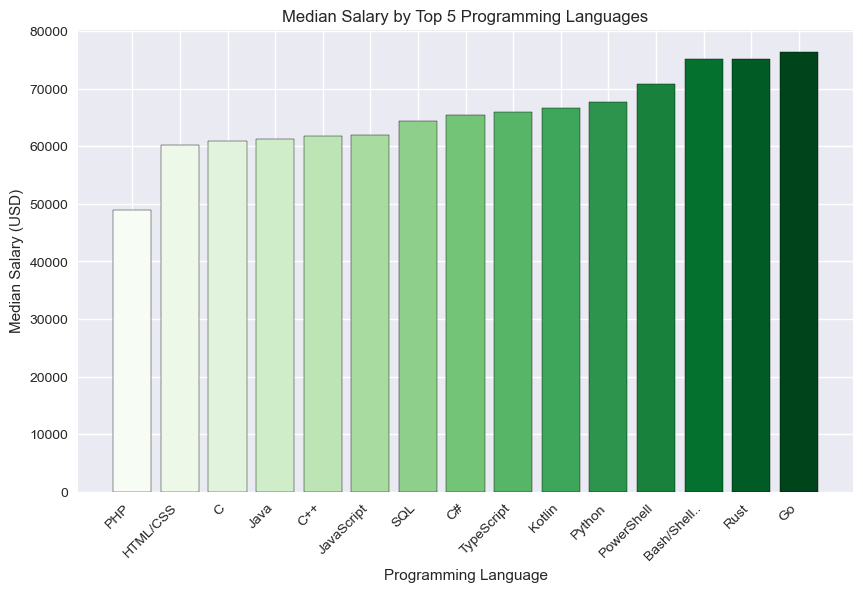

In [227]:
colors = plt.cm.Greens(np.linspace(0, 1, len(top_languages)))  # gradient colormap

plt.figure(figsize=(10,6))
plt.bar(top_languages.index, top_languages.values, color=colors, edgecolor="black")
plt.title("Median Salary by Top 5 Programming Languages")
plt.xlabel("Programming Language")
plt.ylabel("Median Salary (USD)")
plt.xticks(
    ticks=range(len(top_languages.index)),  # positions
    labels=[label[:10] + ".." if len(label) > 10 else label for label in top_languages.index],
    rotation=45,
    ha='right'
)
plt.show()

In [230]:
# Keep only Python and JavaScript
lang_filtered = lang_salary[lang_salary['Language'].isin(['Python', 'JavaScript'])]

# Median salary by WorkExp for each language
median_by_exp = (
    lang_filtered
    .groupby(['WorkExp', 'Language'])['ConvertedCompYearly']
    .median()
    .reset_index()
)

# Pivot so each language has its own column
median_by_exp_pivot = median_by_exp.pivot(index='WorkExp', columns='Language', values='ConvertedCompYearly')

In [231]:
median_by_exp.head()

,WorkExp,Language,ConvertedCompYearly
0,0.0,JavaScript,12000.0
1,0.0,Python,16430.0
2,1.0,JavaScript,17913.0
3,1.0,Python,22509.5
4,2.0,JavaScript,25777.0


In [232]:
median_by_exp_pivot.head()

Language,JavaScript,Python
WorkExp,,
0.0,12000.0,16430.0
1.0,17913.0,22509.5
2.0,25777.0,32222.0
3.0,32222.0,38283.0
4.0,39837.0,47094.0


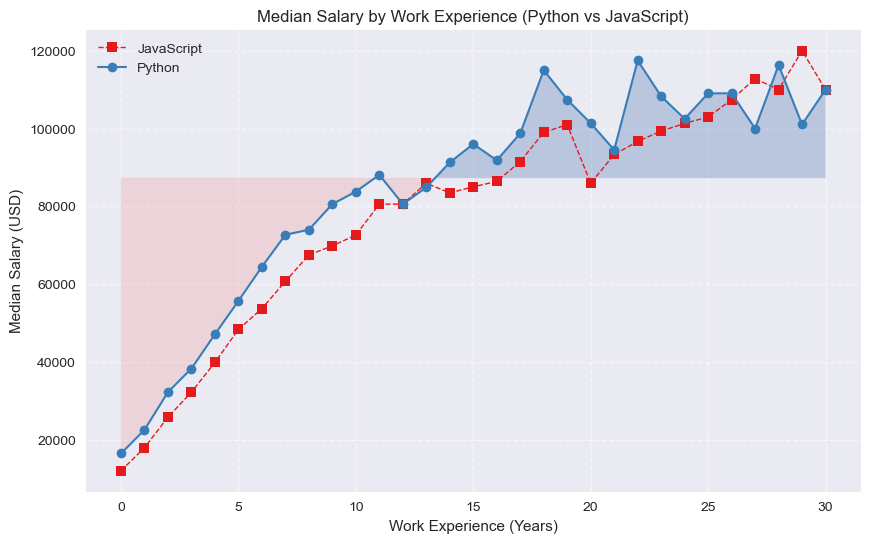

In [303]:
# Plot
plt.figure(figsize=(10, 6))

let_colors = plt.cm.Set1.colors
linewidths = [1, 1.5, 2, 2.5, 3]
linestyles = ['--', '-', '-.', ':']
markers = ['s', 'o', 'D', '^', 'v', '<', '>', 'P', 'X', '*']
let_median = median_by_exp['ConvertedCompYearly'].median()

for i, lang in enumerate(median_by_exp_pivot.columns):
    plt.plot(
        median_by_exp_pivot.index,
        median_by_exp_pivot[lang],
        marker=markers[i % len(markers)],       # cycle through markers
        linestyle=linestyles[i % len(linestyles)],  # cycle through linestyles
        color=let_colors[i % len(let_colors)],
        linewidth=linewidths[i % len(linewidths)],
        label=lang
    )

plt.fill_between(median_by_exp_pivot.index, median_by_exp_pivot['Python'], let_median,
                 where=(median_by_exp_pivot['Python'] > let_median), interpolate=True, alpha=0.3)  # filled area
plt.fill_between(median_by_exp_pivot.index, median_by_exp_pivot['Python'], let_median,
                 where=(median_by_exp_pivot['Python'] <= let_median), interpolate=True, color='red', alpha=0.1)  # filled area

# plt.fill_between(median_by_exp_pivot.index, median_by_exp_pivot['JavaScript'], median_by_exp_pivot['Python'],
#                  where=(median_by_exp_pivot['JavaScript'] <= median_by_exp_pivot['Python']), interpolate=True, color='blue', alpha=0.2)  # filled area
# plt.fill_between(median_by_exp_pivot.index, median_by_exp_pivot['JavaScript'], median_by_exp_pivot['Python'],
#                  where=(median_by_exp_pivot['JavaScript'] > median_by_exp_pivot['Python']), interpolate=True, color='red', alpha=0.2)  # filled area

plt.title("Median Salary by Work Experience (Python vs JavaScript)")
plt.xlabel("Work Experience (Years)")
plt.ylabel("Median Salary (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

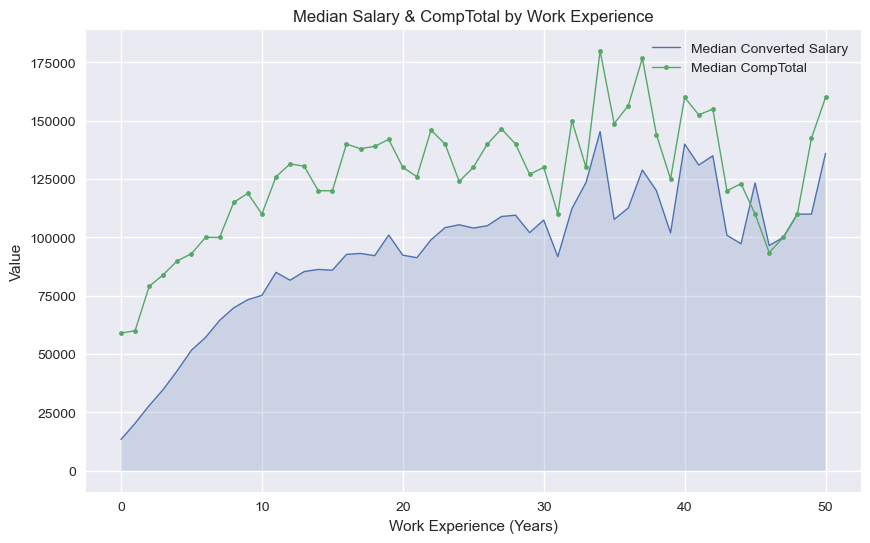

In [238]:
median_comp = cleaned_df_1.groupby('WorkExp')['CompTotal'].median()

plt.figure(figsize=(10,6))
plt.plot(median_salaries.index, median_salaries.values, marker='1', label='Median Converted Salary', linewidth=1)
plt.plot(median_comp.index, median_comp.values, marker='.', label='Median CompTotal', linewidth=1)
plt.fill_between(median_comp.index, median_salaries.values, alpha=0.2)  # filled area
plt.title('Median Salary & CompTotal by Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Value')
plt.legend()
plt.show()

In [368]:
# Count number of responders per country
country_counts = cleaned_df_1['Country'].value_counts()

# Keep only countries with >100 responders
valid_countries = country_counts[country_counts > 100].index

# Filter the dataset
filtered_df = cleaned_df_1[cleaned_df_1['Country'].isin(valid_countries)]

# Now calculate median salary by country
median_country_salary = (
    filtered_df.groupby('Country')['ConvertedCompYearly']
    .median()
    .sort_values(ascending=False)
    .head(15)
)

sal_colors = plt.cm.coolwarm(np.linspace(0, 1, len(median_country_salary)))

In [369]:
valid_countries

Index(['United States of America', 'Germany',
       'United Kingdom of Great Britain and Northern Ireland', 'Ukraine',
       'India', 'Canada', 'France', 'Brazil', 'Poland', 'Spain', 'Netherlands',
       'Italy', 'Australia', 'Sweden', 'Switzerland', 'Austria',
       'Czech Republic', 'Russian Federation', 'Israel', 'Portugal', 'Norway',
       'Belgium', 'Denmark', 'Turkey', 'Mexico', 'Finland', 'Romania',
       'Greece', 'Hungary', 'South Africa', 'Pakistan'],
      dtype='object', name='Country')

In [370]:
median_country_salary.head()

Country
United States of America    145000.0
Israel                      117651.5
Switzerland                 111974.0
Australia                    95796.0
Canada                       87231.0
Name: ConvertedCompYearly, dtype: float64

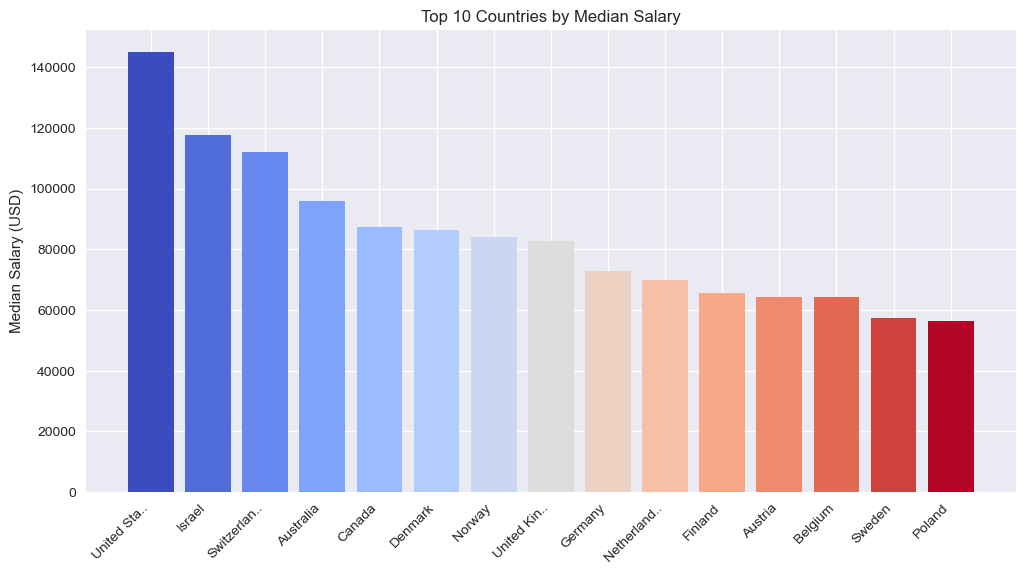

In [371]:
plt.figure(figsize=(12,6))
plt.bar(median_country_salary.index, median_country_salary.values, color=sal_colors)
plt.title("Top 10 Countries by Median Salary")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Median Salary (USD)")
plt.xticks(
    ticks=range(len(median_country_salary.index)),  # positions
    labels=[label[:10] + ".." if len(label) > 10 else label for label in median_country_salary.index],
    rotation=45,
    ha='right'
)
plt.show()


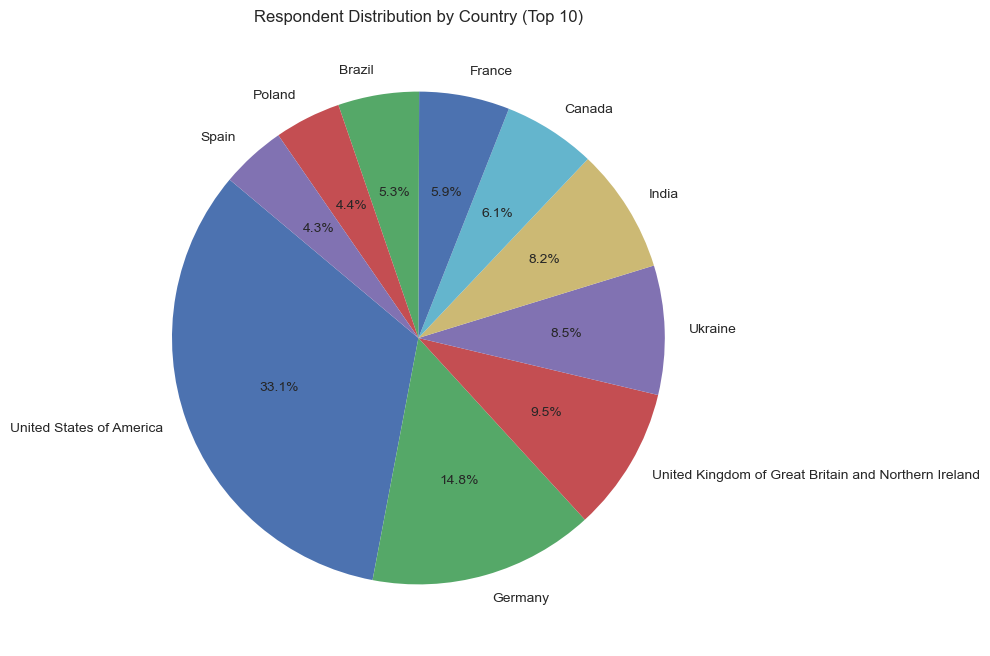

In [372]:
top_countries = cleaned_df_1['Country'].value_counts().head(10)

plt.figure(figsize=(8,8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title("Respondent Distribution by Country (Top 10)")
plt.show()